# Diagnosing Heart Disease Using ML
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

## Load Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [27]:
df = pd.read_csv("C:/Users/3arrows/Desktop/ML Projects/Heart Disease UCI/heart-Copy1.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
dfml = df.copy()

In [29]:
dfml.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [30]:
dfml.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
dfml['sex'][dfml['sex'] == 0] = 'female'
dfml['sex'][dfml['sex'] == 1] = 'male'

dfml['chest_pain_type'][dfml['chest_pain_type'] == 1] = 'typical angina'
dfml['chest_pain_type'][dfml['chest_pain_type'] == 2] = 'atypical angina'
dfml['chest_pain_type'][dfml['chest_pain_type'] == 3] = 'non-anginal pain'
dfml['chest_pain_type'][dfml['chest_pain_type'] == 4] = 'asymptomatic'

dfml['fasting_blood_sugar'][dfml['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dfml['fasting_blood_sugar'][dfml['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dfml['rest_ecg'][dfml['rest_ecg'] == 0] = 'normal'
dfml['rest_ecg'][dfml['rest_ecg'] == 1] = 'ST-T wave abnormality'
dfml['rest_ecg'][dfml['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dfml['exercise_induced_angina'][dfml['exercise_induced_angina'] == 0] = 'no'
dfml['exercise_induced_angina'][dfml['exercise_induced_angina'] == 1] = 'yes'

dfml['st_slope'][dfml['st_slope'] == 1] = 'upsloping'
dfml['st_slope'][dfml['st_slope'] == 2] = 'flat'
dfml['st_slope'][dfml['st_slope'] == 3] = 'downsloping'

dfml['thalassemia'][dfml['thalassemia'] == 1] = 'normal'
dfml['thalassemia'][dfml['thalassemia'] == 2] = 'fixed defect'
dfml['thalassemia'][dfml['thalassemia'] == 3] = 'reversable defect'

C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __nam

In [32]:
dfml.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [33]:
dfml['sex'] = dfml['sex'].astype('object')
dfml['chest_pain_type'] = dfml['chest_pain_type'].astype('object')
dfml['fasting_blood_sugar'] = dfml['fasting_blood_sugar'].astype('object')
dfml['rest_ecg'] = dfml['rest_ecg'].astype('object')
dfml['exercise_induced_angina'] = dfml['exercise_induced_angina'].astype('object')
dfml['st_slope'] = dfml['st_slope'].astype('object')
dfml['thalassemia'] = dfml['thalassemia'].astype('object')

In [34]:
dfml.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

## Data Exploration

In [35]:
dfml.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [36]:
countNoDisease = len(dfml[dfml.target == 0])
countHaveDisease = len(dfml[dfml.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(dfml.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(dfml.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [37]:
countFemale = len(dfml[dfml.sex == 'female'])
countMale = len(dfml[dfml.sex == 'male'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dfml.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dfml.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [38]:
dfml.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


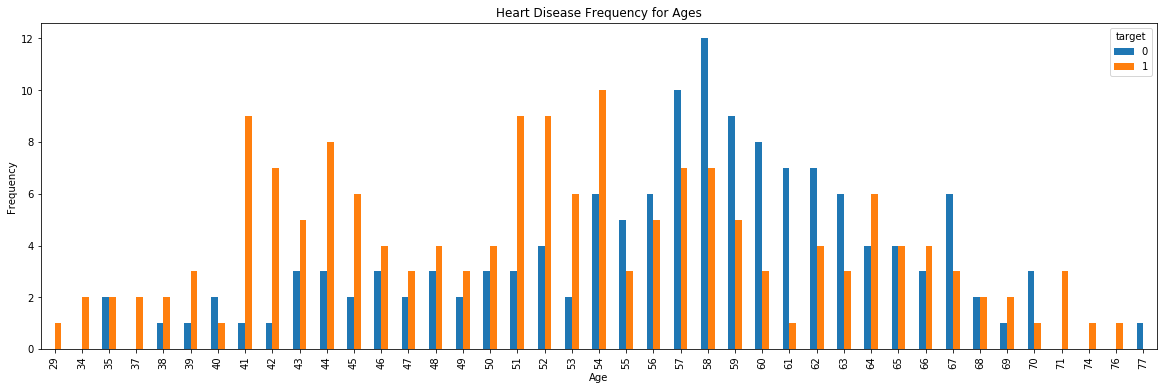

In [39]:
pd.crosstab(dfml.age,dfml.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

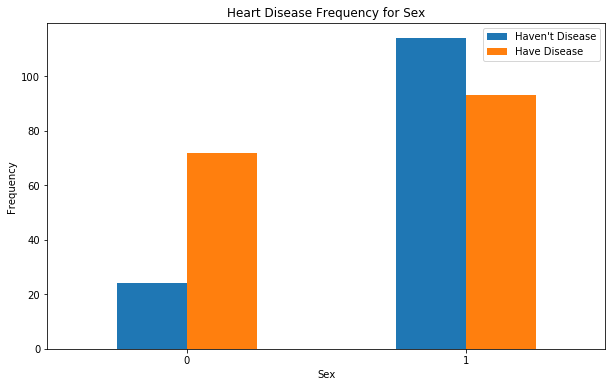

In [53]:
pd.crosstab(dfml.sex, dfml.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

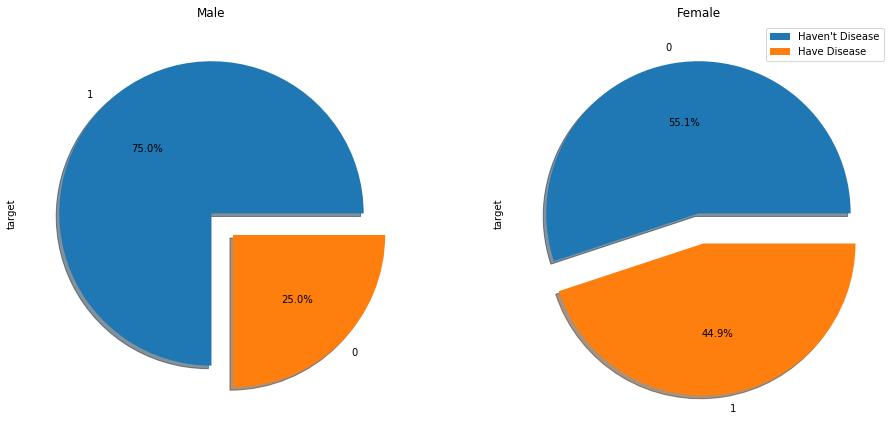

In [56]:
f,ax=plt.subplots(1,2,figsize=(16,7))
dfml['target'][df['sex']== 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
dfml['target'][df['sex']== 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Male')
ax[1].set_title('Female')
plt.legend(["Haven't Disease", "Have Disease"])

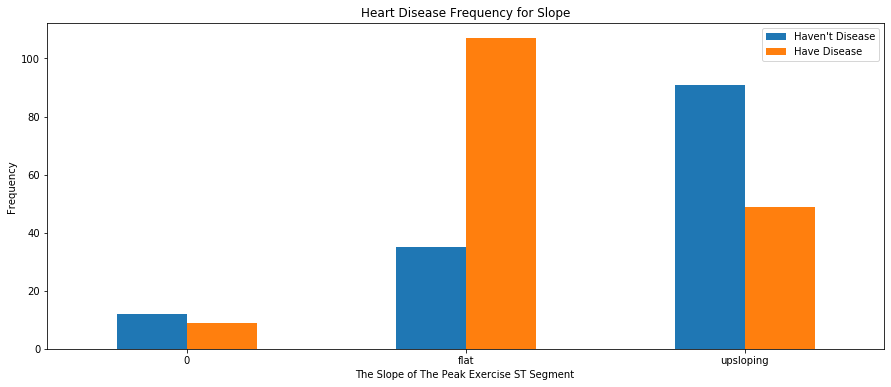

In [42]:
pd.crosstab(dfml.st_slope,dfml.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

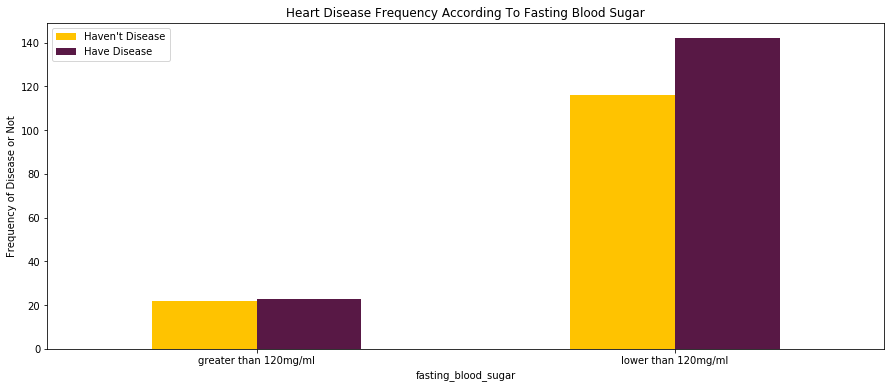

In [44]:
pd.crosstab(dfml.fasting_blood_sugar,dfml.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

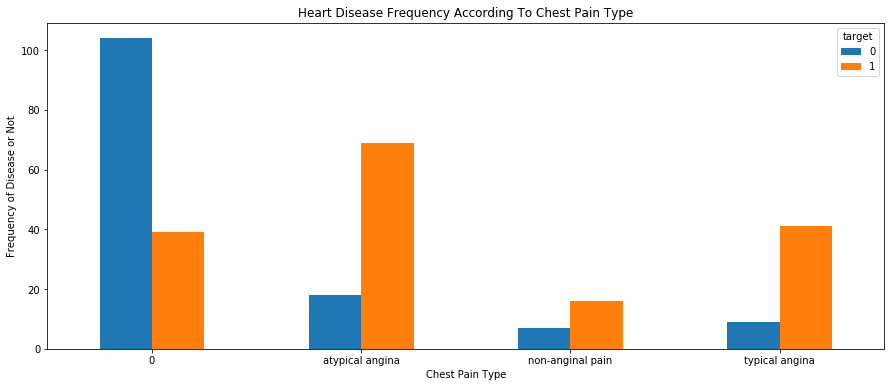

In [45]:
pd.crosstab(dfml.chest_pain_type,dfml.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [46]:
dfml.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1


### Creating Dummy Variables

Since  'sex' , 'chest_pain_type', 'fasting_blood_sugar' , 'rest_ecg' and 'thalassemia' are categorical variables we need to create dummy variables.

In [47]:
dfml = pd.get_dummies(dfml, drop_first=True)

In [48]:
dfml.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


<a id="8"></a> <br>
# Machine Learning Algorithms
<img src="https://i.vas3k.ru/7vx.jpg">
Image credit:vas3k.com 

### Prepare Train and Test

In [57]:
y = dfml.target.values
x_data = dfml.drop(['target'], axis = 1)

### Normalize Data
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [58]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [66]:
print("DataTrain Shape: {}".format(dfml.shape))
print("Train Shape: {}".format(x_train.shape))
print("Test Shape: {}".format(x_test.shape))

DataTrain Shape: (303, 20)
Train Shape: (242, 19)
Test Shape: (61, 19)


#### 1. K-Nearest Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

print('accuracy is', Model.score(x_test,y_test))

accuracy is 0.8524590163934426


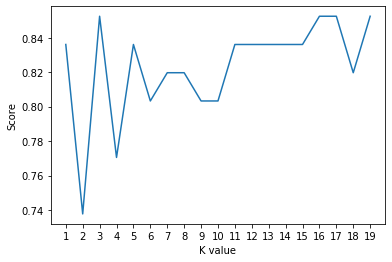

Maximum KNN Score is  0.8524590163934426


In [102]:
scoreList = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    scoreList.append(knn.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

KNN = max(scoreList)
print("Maximum KNN Score is " , KNN )


#### 2. Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

Model = GaussianNB().fit(x_train, y_train)

print('accuracy is', Model.score(x_test, y_test))

NBB = Model.score(x_test, y_test)

accuracy is 0.8688524590163934


#### 3.Support Vector Machines (SVM)

In [84]:
from sklearn.svm import SVC

Model = SVC().fit(x_train, y_train)

print('accuracy is', Model.score(x_test, y_test))

SVMm =  Model.score(x_test, y_test)

accuracy is 0.8524590163934426


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 4. Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression().fit(x_train, y_train)

print('accuracy is',Model.score(x_test, y_test))

LR = Model.score(x_test, y_test)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy is 0.8688524590163934


#### 5. Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier().fit(x_train, y_train)

print('accuracy is', Model.score(x_test, y_test))

DT = Model.score(x_test, y_test)

accuracy is 0.7213114754098361


#### 6. RandomForest

In [98]:
from sklearn.ensemble import RandomForestClassifier

Model=RandomForestClassifier(max_depth=2 , n_estimators = 2000).fit(x_train, y_train)

print('accuracy is ', Model.score(x_test, y_test))

RT = Model.score(x_test, y_test)

accuracy is  0.8360655737704918


### Comparing Algorithms

In [103]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Naive Bayes', 'Support Vector Machines', 'Decision Tree', 'LogisticRegression', 'Random Forest'],
    'Score': [ KNN, NBB, SVMm, DT, LR, RT]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.868852
4,LogisticRegression,0.868852
0,K-Nearest Neighbours,0.852459
2,Support Vector Machines,0.852459
5,Random Forest,0.836066
3,Decision Tree,0.721311


Text(0, 0.5, 'Algorithm')

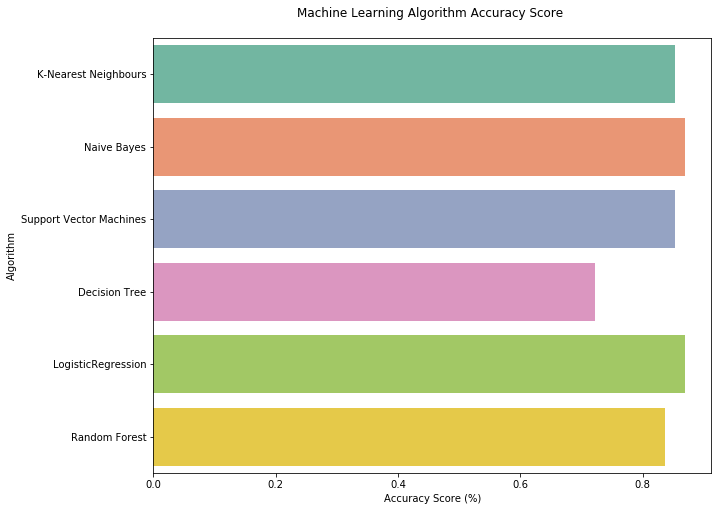

In [106]:
plt.subplots(figsize =(10, 8))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set2")

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Our models work fine but best of them are Naive Bayes and LogisticRegression with 86.88% of accuracy.

In [113]:
submit_gbc = GaussianNB().fit(x, y)

rr = submit_gbc.predict(x)

In [114]:
rr

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [120]:
x.index

RangeIndex(start=0, stop=303, step=1)

In [123]:
submission = pd.DataFrame({
        "Target": rr
    })
submission.to_csv('heart-disease.csv', index=False)

submission.head(10)

,Target
0,0
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,1
